Global gmin set to 1e-12
Global lmin set to 1.8e-07
Data imported into datalump
testNMOS initialized
Commencing full-run. This can take 2h or more with a fairly powerful CPU.
Running stage 1 of 14: vto_phi_gamma
all vg_vp curves will be plotted here, but red line should match with 27°C curve
Stage complete!
Result vector for this stage: [0.56335814 4.96026617 1.37830437]
Time taken for this stage: 0:00:24.520665
Running stage 2 of 14: leta
no plots for this stage
Stage complete!
Result vector for this stage: [-0.10328123]
Time taken for this stage: 0:00:08.795483
Running stage 3 of 14: weta
no plots for this stage
Stage complete!
Result vector for this stage: [-0.0987545]
Time taken for this stage: 0:00:01.896526
Running stage 4 of 14: lk_q0
Stage complete!
Result vector for this stage: [1.62862788e-01 7.25064474e-05]
Time taken for this stage: 0:00:01.598351
Running stage 5 of 14: kp_e0
Stage complete!
Result vector for this stage: [2.53229111e-04 1.00000000e+12]
Time taken for this s

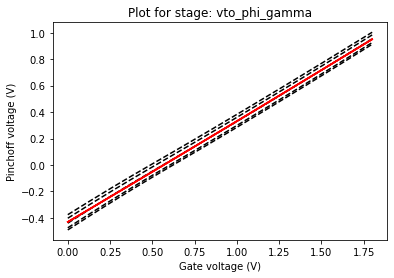

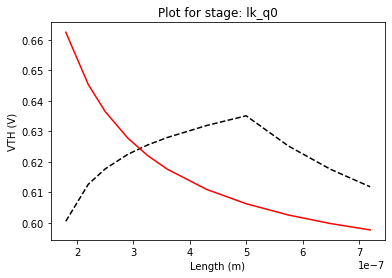

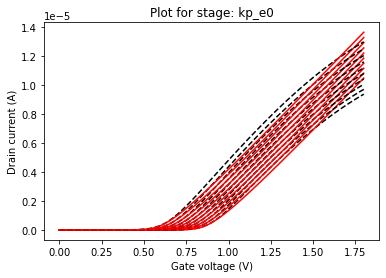

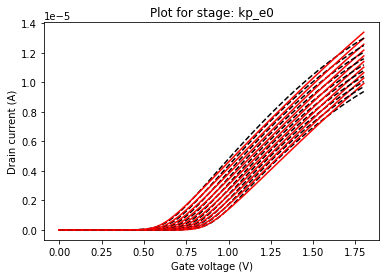

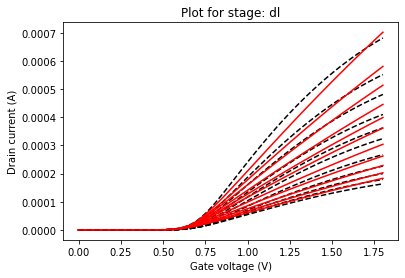

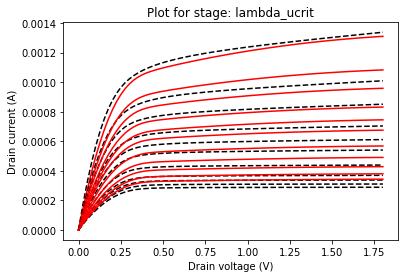

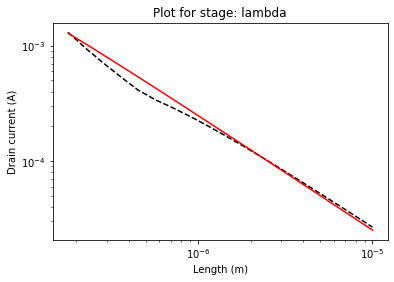

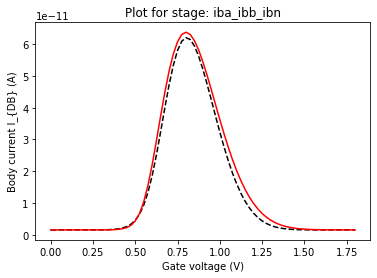

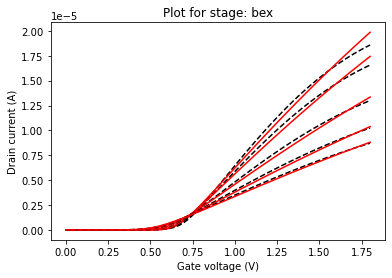

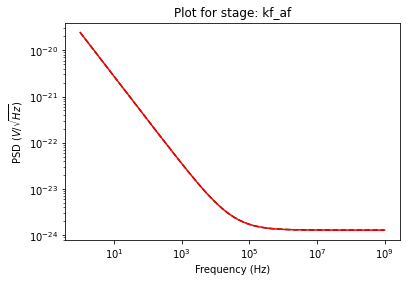

In [127]:
"""
Example to demonstrate a full conversion run on the included nmos example data.
"""

import bsim2ekv as b2e
import ekv
import mpmath as mp
import numpy as np
import importlib
importlib.reload(ekv)
importlib.reload(b2e)

filenamedict = {
    "wl_is_temp_data" : "./exampledata/0u18_nmos/0u18_nmos_wl_is_temp.vcsv",
    "wl_vp_vg_temp_data" : "./exampledata/0u18_nmos/0u18_nmos_wl_vp_vg_tempdata.vcsv",
    "wl_id_vg_vb_linear_data" : "./exampledata/0u18_nmos/0u18_nmos_wl_id_vg_vb.vcsv",
    "wl_id_vg_linear_temp_data" : "./exampledata/0u18_nmos/0u18_nmos_wl_id_vg_linear_temp.vcsv",
    "wl_ib_vg_sat_data" : "./exampledata/0u18_nmos/0u18_nmos_wl_saturation_vg_ib.vcsv",
    "wl_noise_data" : "./exampledata/0u18_nmos/0u18_nmos_wl_id_sat_noise.vcsv",
    "ws_is_data" : "./exampledata/0u18_nmos/0u18_nmos_ws_is_temp.vcsv",
    "ws_vp_vg_data" : "./exampledata/0u18_nmos/0u18_nmos_ws_set_vp_vg.vcsv",
    "ws_id_vg_linear_data" : "./exampledata/0u18_nmos/0u18_nmos_ws_linear_region_id.vcsv",
    "ws_id_vg_sat_temp_data" : "./exampledata/0u18_nmos/0u18_nmos_ws_id_vg_sat_temp.vcsv",
    "ws_id_vd_sat_data" : "./exampledata/0u18_nmos/0u18_nmos_ws_saturation_vd_id.vcsv",
    "nl_is_data" : "./exampledata/0u18_nmos/0u18_nmos_nl_is.vcsv",
    "nl_vp_vg_data" : "./exampledata/0u18_nmos/0u18_nmos_nl_set_vp_vg.vcsv",
    "sat_region_len_isdata" : "./exampledata/0u18_nmos/0u18_nmos_saturation_len_id.vcsv"
}

b2e.global_gmin = 1e-12
b2e.global_lmin = 180e-9
b2e.global_dec_targ = 25
b2e.global_dec_flag = True

print(f'Global gmin set to {b2e.global_gmin}')
print(f'Global lmin set to {b2e.global_lmin}')

datalump = b2e.data_ingest(filenamedict)


#make IB data negative; example data has wrong polarity
for a in range(len(datalump.wl_ib_vg_sat_data)):
    datalump.wl_ib_vg_sat_data['IB'][a] = -datalump.wl_ib_vg_sat_data['IB'][a]

print('Data imported into datalump')

initparams = {
    'TNOM' : 300,
    'TOX' : 4e-9,
    'NSUB' : 8.45e17,
    'XJ' : 150e-9,
    'DW' : -2*11.679e-9,
    'DL' : -2*13.267e-9,
    'U0' : 12.74093e-3,
    'VMAX' : 93.964e3,
    'IBB' : 434426950.2685,
    'IBA' : 5415957346.3027,
}

try:
    del(testNMOS)
except:
    pass

testNMOS = ekv.MOS(initparams)

print('testNMOS initialized')

print('Commencing full-run. This can take 2h or more with a fairly powerful CPU.')

b2e.full_run(
    datalump,
    testNMOS,
    proclist=[
        'vto_phi_gamma',
        'leta',
        'weta',
        'lk_q0',
        'kp_e0',
        'kp_e0',
        'dl',
        'lambda_ucrit',
        'lambda',
        'iba_ibb_ibn',
        'tcv',
        'bex',
        'ucex',
        'kf_af'
    ]
)


Global gmin set to 1e-12
Global lmin set to 1.8e-07
Data imported into datalump
testPMOS initialized
Commencing full-run. This can take 2h or more with a fairly powerful CPU.
Running stage 1 of 14: vto_phi_gamma
all vg_vp curves will be plotted here, but red line should match with 27°C curve
Stage complete!
Result vector for this stage: [ 0.63644746 30.97544867  4.35354378]
Time taken for this stage: 0:01:02.102482
Running stage 2 of 14: leta
no plots for this stage
Stage complete!
Result vector for this stage: [-0.01932997]
Time taken for this stage: 0:00:08.427459
Running stage 3 of 14: weta
no plots for this stage
Stage complete!
Result vector for this stage: [-0.00300782]
Time taken for this stage: 0:00:01.925354
Running stage 4 of 14: lk_q0
Stage complete!
Result vector for this stage: [0.03327274 0.00020606]
Time taken for this stage: 0:00:00.983977
Running stage 5 of 14: kp_e0
Stage complete!
Result vector for this stage: [5.06498563e-05 1.08825000e+15]
Time taken for this stage

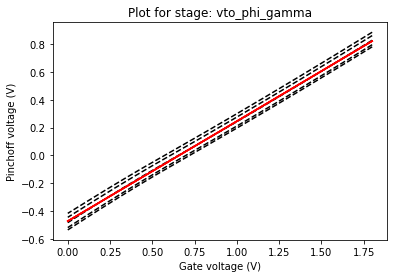

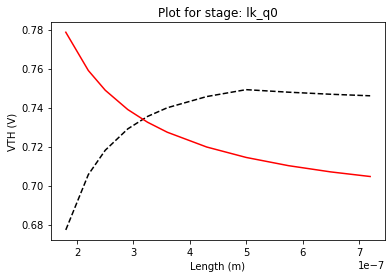

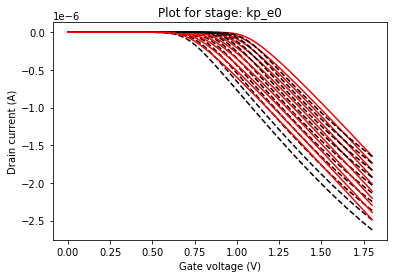

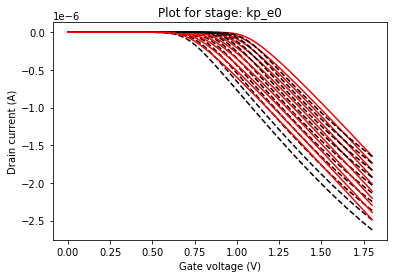

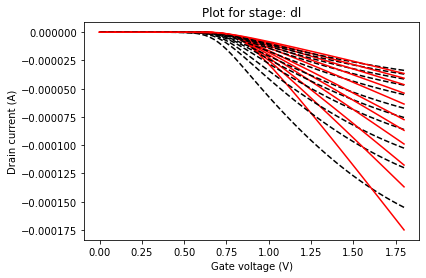

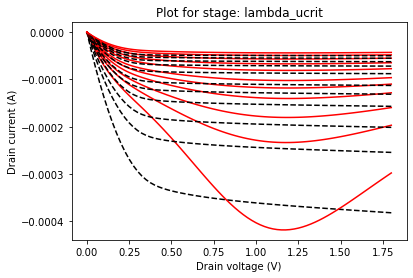

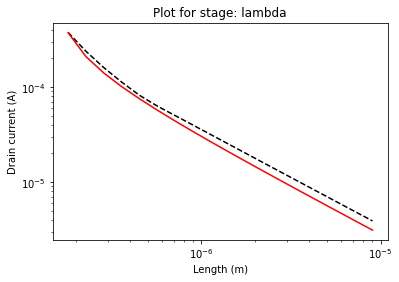

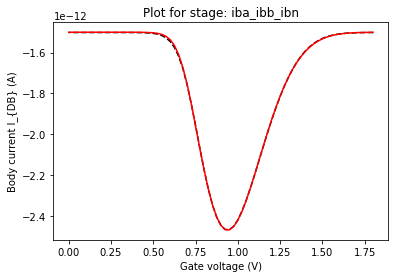

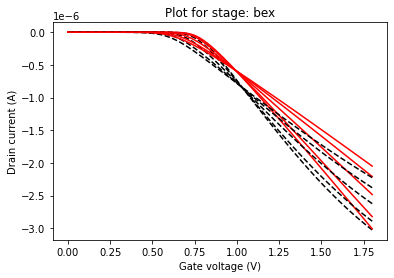

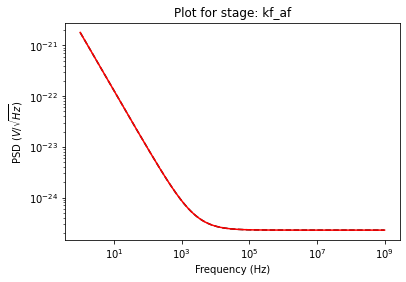

In [260]:
"""
Example to demonstrate a full conversion run on the included pmos example data.
"""

import bsim2ekv as b2e
import ekv
import mpmath as mp
import numpy as np
import importlib
importlib.reload(ekv)
importlib.reload(b2e)

filenamedict = {
    "wl_is_temp_data" : "./exampledata/0u18_pmos/0u18_pmos_wl_is_temp_data.vcsv",
    "wl_vp_vg_temp_data" : "./exampledata/0u18_pmos/0u18_pmos_wl_vp_vg_temp_data.vcsv",
    "wl_id_vg_vb_linear_data" : "./exampledata/0u18_pmos/0u18_pmos_wl_id_vg_vb_linear_data.vcsv",
    "wl_id_vg_linear_temp_data" : "./exampledata/0u18_pmos/0u18_pmos_wl_id_vg_linear_temp_data.vcsv",
    "wl_ib_vg_sat_data" : "./exampledata/0u18_pmos/0u18_pmos_wl_ib_vg_sat_data.vcsv",
    "wl_noise_data" : "./exampledata/0u18_pmos/0u18_pmos_wl_noise_data.vcsv",
    "ws_is_data" : "./exampledata/0u18_pmos/0u18_pmos_ws_is_data.vcsv",
    "ws_vp_vg_data" : "./exampledata/0u18_pmos/0u18_pmos_ws_vp_vg_data.vcsv",
    "ws_id_vg_linear_data" : "./exampledata/0u18_pmos/0u18_pmos_ws_id_vg_linear_data.vcsv",
    "ws_id_vg_sat_temp_data" : "./exampledata/0u18_pmos/0u18_pmos_ws_id_vg_sat_temp_data.vcsv",
    "ws_id_vd_sat_data" : "./exampledata/0u18_pmos/0u18_pmos_ws_id_vd_sat_data.vcsv",
    "nl_is_data" : "./exampledata/0u18_pmos/0u18_pmos_nl_is_data.vcsv",
    "nl_vp_vg_data" : "./exampledata/0u18_pmos/0u18_pmos_nl_vp_vg_data.vcsv",
    "sat_region_len_isdata" : "./exampledata/0u18_pmos/0u18_pmos_sat_region_len_isdata.vcsv"
}

default_params = {

    "wlmax" : mp.mpf('10e-6'),
    "wslengths" : [1.8e-07, 2.2e-07, 2.5e-07, 2.9e-07, 3.25e-07, 3.6e-07, 4.3e-07, 5.0e-07, 5.75e-07, 6.5e-07, 7.2e-07],
    "nlwidths" : [0.22e-6, 0.44e-6],
    "temps" : [-40.0, -20.0, 27, 80, 120],
    #vbsweep values here are in terms of deviation from nominal value
    #absolute vb is swept from 1.8 to 2.7 in this example dataset
    #but vbsweep vals should be given in terms of relative deviation from nom
    #these voltages should all be sign-flipped too
    #e.g. for vdlinearnom = -50e-3 in bsim simulations, should be 50e-3 here
    "vbsweep" : np.linspace(0,-0.9,10),
    # all voltages below are bulk ref'd as per EKV convention!
    # usually vbulk = vss though
    "vdlinearnom" : 50e-3, #nominal linear region drain voltage
    "vdsatnom" : 1.5, #nominal saturation region drain voltage
    "vgsatnom" : 1.1, #nominal saturation region gate voltage
    "vdd" : 1.8,
    "vss" : 0,

}

b2e.global_gmin = 1e-12
b2e.global_lmin = 180e-9
b2e.global_dec_targ = 25
b2e.global_dec_flag = True

print(f'Global gmin set to {b2e.global_gmin}')
print(f'Global lmin set to {b2e.global_lmin}')

datalump = b2e.data_ingest(filenamedict)


#make IB data negative; example data has wrong polarity
for a in range(len(datalump.wl_ib_vg_sat_data)):
    datalump.wl_ib_vg_sat_data['IB'][a] = -datalump.wl_ib_vg_sat_data['IB'][a]
    
    
#voltage sign-flipping routine for the rest of the data

#two lists, some datasets need independent and dependents flipped, others just independents.
#sat_region_len_isdata needs no flipping, as independent data is length, not node voltage

flipone = [
    "wl_is_temp_data",
    "wl_id_vg_vb_linear_data",
    "wl_id_vg_linear_temp_data",
    "wl_ib_vg_sat_data",
    "ws_is_data",
    "ws_id_vg_linear_data",
    "ws_id_vg_sat_temp_data",
    "ws_id_vd_sat_data",
    "nl_is_data"
]

flipboth = [
    "wl_vp_vg_temp_data",
    "ws_vp_vg_data",
    "nl_vp_vg_data"
]

for attr in flipone:
    dat = getattr(datalump,attr)
    nl = dat.dtype.names
    for a in range(len(nl)):
        if(not(a%2)):
            for b in range(len(dat[nl[a]])):
                dat[nl[a]][b] = -dat[nl[a]][b]
                
for attr in flipboth:
    dat = getattr(datalump,attr)
    nl = dat.dtype.names
    for a in range(len(nl)):
        for b in range(len(dat[nl[a]])):
            dat[nl[a]][b] = -dat[nl[a]][b]

print('Data imported into datalump')

initparams = {
    'TNOM' : 300,
    'TOX' : 4e-9,
    'NSUB' : 8.45e17,
    'XJ' : 150e-9,
    'DW' : -2*11.679e-9,
    'DL' : -2*13.267e-9,
    'U0' : 12.74093e-3,
    'VMAX' : 93.964e3,
    'IBB' : 434426950.2685,
    'IBA' : 5415957346.3027,
    'polarity' : 'p'
}

try:
    del(testPMOS)
except:
    pass

testPMOS = ekv.MOS(initparams)

print('testPMOS initialized')

print('Commencing full-run. This can take 2h or more with a fairly powerful CPU.')

#modify params for vto_phi_gamma stage

# b2e.resid_func_lookup['vto_phi_gamma'] = [
#         b2e.find_vto_phi_gamma, #function that returns residuals
#         'wl_vp_vg_temp_data', #dataset name (attribute of datalump)
#         [0.4, 0.2, 0.5], #initial conditions
#         ['VTO', 'PHI', 'GAMMA'], #mos attribute names
#         [
#             b2e.plot_vg_vp,
#             'Gate voltage (V)',
#             'Pinchoff voltage (V)'
#         ], #plotting function and axis labels
#         {
#             #'method' : 'lm'
#             'bounds' : (
#                 (0,0,0),
#                 (1,1,2)
#             )
#         } #additional params
#     ]

plist = [
    'vto_phi_gamma',
    'leta',
    'weta',
    'lk_q0',
    'kp_e0',
    'kp_e0',
    'dl',
    'lambda_ucrit',
    'lambda',
    'iba_ibb_ibn',
    'tcv',
    'bex',
    'ucex',
    'kf_af'
]

plist2 = [
    'vto_phi_gamma',
    'leta',
    'weta',
    'lk_q0',
    'kp_e0_lk',
    #'kp_e02',
    'dl'
]

plist3 = [
    'vto_phi_gamma',
    'leta',
    'weta',
    'lk_q0',
]

b2e.full_run(
    datalump,
    testPMOS,
    proclist=plist
)



# Below: exploration of alternative methods to fit PMOS data. Fit is still fairly poor even with alternative approaches.

Running stage 1 of 8: vto_phi_gamma
all vg_vp curves will be plotted here, but red line should match with 27°C curve
Stage complete!
Result vector for this stage: [ 0.63644746 30.97544867  4.35354378]
Time taken for this stage: 0:01:00.270988
Running stage 2 of 8: leta
no plots for this stage
Stage complete!
Result vector for this stage: [-0.01972282]
Time taken for this stage: 0:00:19.814324
Running stage 3 of 8: weta
no plots for this stage
Stage complete!
Result vector for this stage: [-0.00260104]
Time taken for this stage: 0:00:04.313223
Running stage 4 of 8: lk_q02
Stage complete!
Result vector for this stage: [ 3.05176772e-05 -3.31147951e-04]
Time taken for this stage: 0:23:20.659794
Running stage 5 of 8: lk_q0
Stage complete!
Result vector for this stage: [-1.86351510e-06  1.99471642e-04]
Time taken for this stage: 0:00:02.188238
Running stage 6 of 8: kp_e0
Stage complete!
Result vector for this stage: [5.06233908e-05 1.05625000e+15]
Time taken for this stage: 0:23:23.181144
Ru

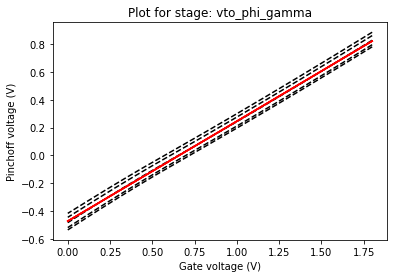

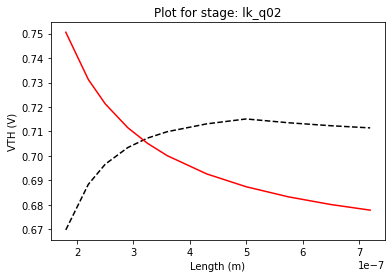

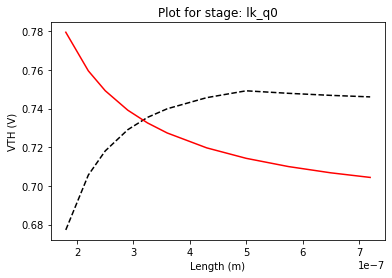

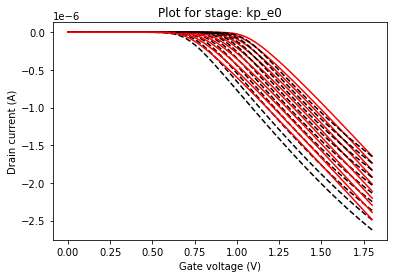

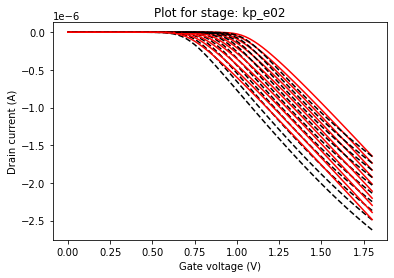

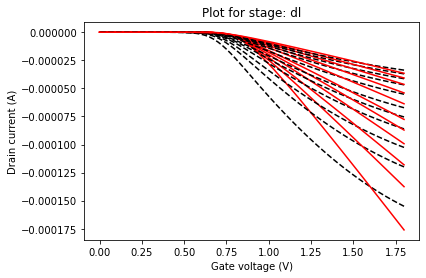

In [228]:
importlib.reload(ekv)
importlib.reload(b2e)
b2e.full_run(
    datalump,
    testPMOS,
    proclist=[
        'vto_phi_gamma',
        'leta',
        'weta',
        'lk_q02',
        'lk_q0',
        'kp_e0',
        'kp_e02',
        'dl'
]
)
# b2e.plotwrapper('lk_q02',datalump,testPMOS)

In [258]:
import copy
#testPMOSBAK = copy.deepcopy(testPMOS)
testPMOS = copy.deepcopy(testPMOSBAK)
testPMOS.UCRIT/1e10

mpf('7.3749718427147783')

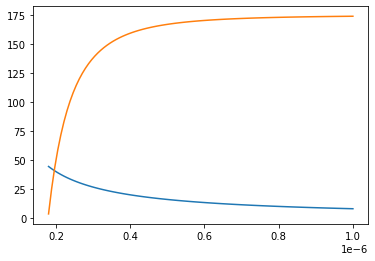

In [247]:
xl = np.linspace(.18e-6,1e-6,100)
plt.figure()
plt.plot(xl,[
    2/((x**1)*2.5e5) for x in xl
])
plt.plot(xl,[
    #((x**4)*4e26) for x in xl
    175-(1/x**3)/1e18 for x in xl
])

Running stage 1 of 5: lambda_ucrit
Stage complete!
Result vector for this stage: [3.71462155e+00 7.99238463e+06]
Time taken for this stage: 0:14:36.715328
Running stage 2 of 5: ucrit
Stage complete!
Result vector for this stage: [3702678.68167141]
Time taken for this stage: 0:09:29.679940
Running stage 3 of 5: lambda_ucrit_resid_deriv
Stage complete!
Result vector for this stage: [3.13859636e+00 1.31972525e+07]
Time taken for this stage: 0:32:55.075574
Running stage 4 of 5: kp_e0
Stage complete!
Result vector for this stage: [5.05550040e-05 2.66703778e+14]
Time taken for this stage: 0:04:00.211422
Running stage 5 of 5: lambda_ucrit
Stage complete!
Result vector for this stage: [3.71567057e+00 7.98921367e+06]
Time taken for this stage: 0:20:09.400229
All stages complete!
Total time taken: 1:21:11.082951
Check MOS W,L, and T of MOS object before running more calculations.
BSIM data vs EKV calculated saturation current vs length:


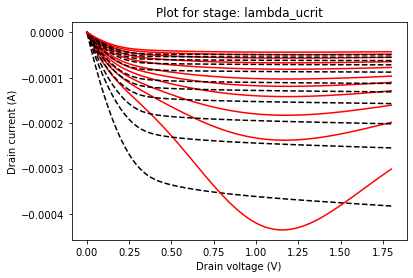

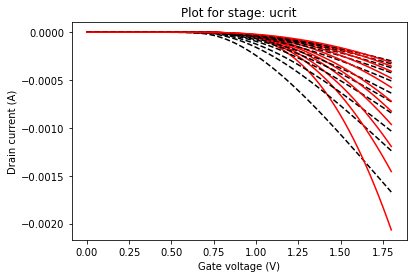

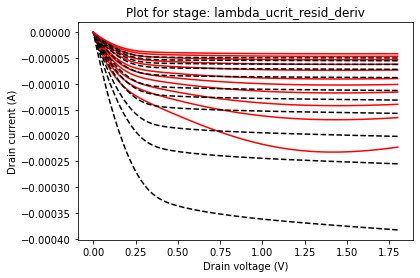

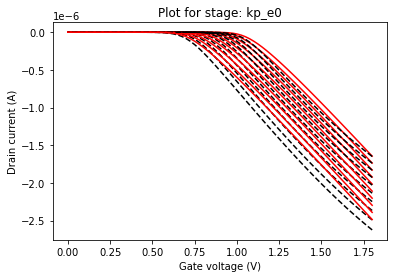

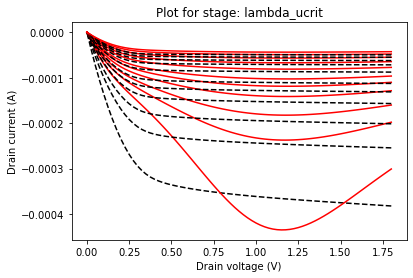

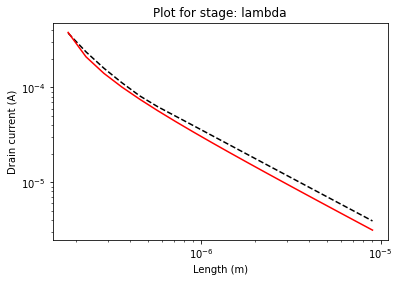

In [259]:
importlib.reload(ekv)
importlib.reload(b2e)
# b2e.weightfunc = lambda x: 2/((x**1)*2.5e5)
# b2e.weightfunc = lambda x: 175-(1/x**3)/1e18
# b2e.weightfunc = lambda x: (x**2)/1e6
b2e.weightfunc = lambda x: 100
b2e.full_run(
    datalump,
    testPMOS,
    proclist=[
#     'dl',
        'lambda_ucrit',
#     'lambda'
        'ucrit',
        'lambda_ucrit_resid_deriv',
#         'ucrit',
#         'lambda'
        'kp_e0',
        'lambda_ucrit'
]
)
b2e.plotwrapper('lambda',datalump,testPMOS)